# 1 import 

In [23]:
# Ignore  the warnings
import warnings

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.svm import LinearSVC,SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
# from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer as Imputer

#evaluation metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

#configure sets matplotlib to inline and displays graphs below the corressponding cell.
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)



# 2 load

In [2]:
df = pd.read_csv(r'winequality-white.csv', delimiter=';')

In [3]:
ori_df = pd.read_csv(r'winequality-white.csv', delimiter=';')

In [4]:
df['quality'].min()

3

In [5]:
df.shape

(4898, 12)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
df.isnull().sum(0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

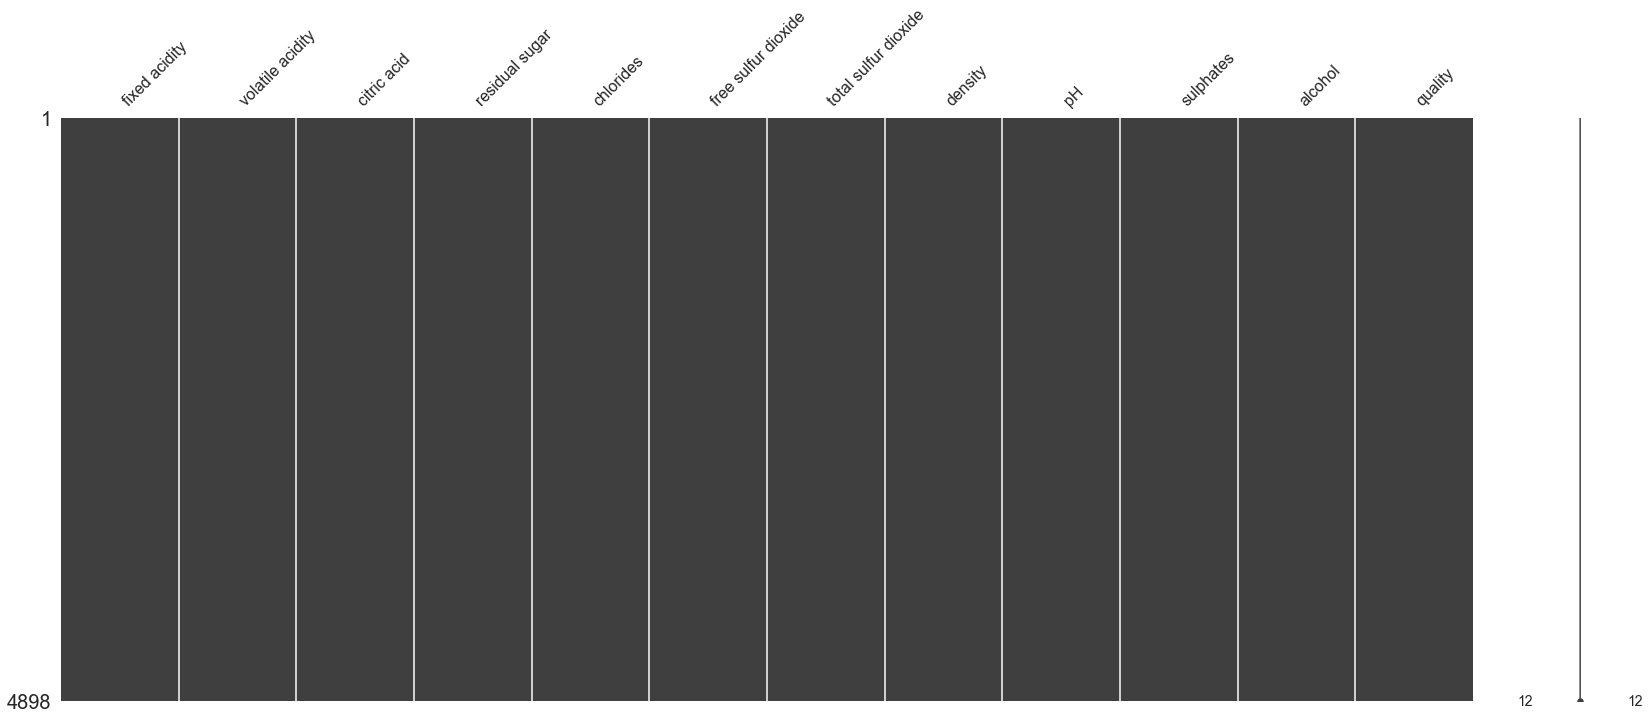

In [10]:
msno.matrix(df) 

In [11]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


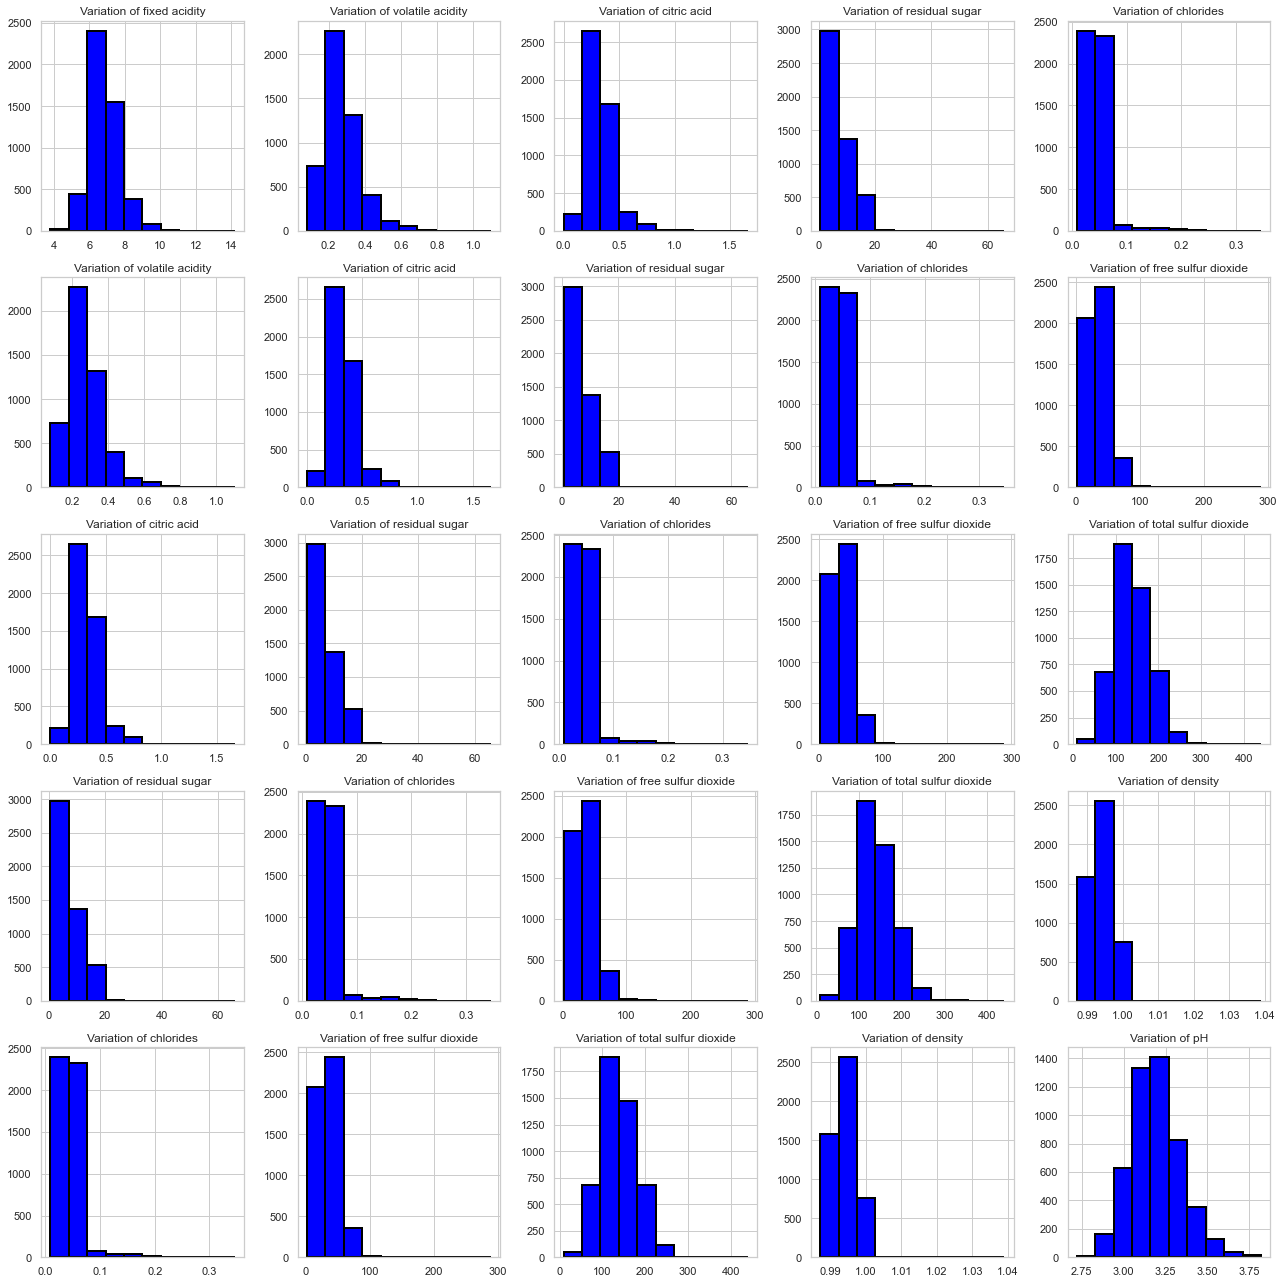

In [12]:
# using a histogram.
fig,axes=plt.subplots(5,5)
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for i in range (5):
    for j in range (5):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='blue')
        axes[i,j].set_title('Variation of '+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(18,18)
fig.tight_layout()

<AxesSubplot:>

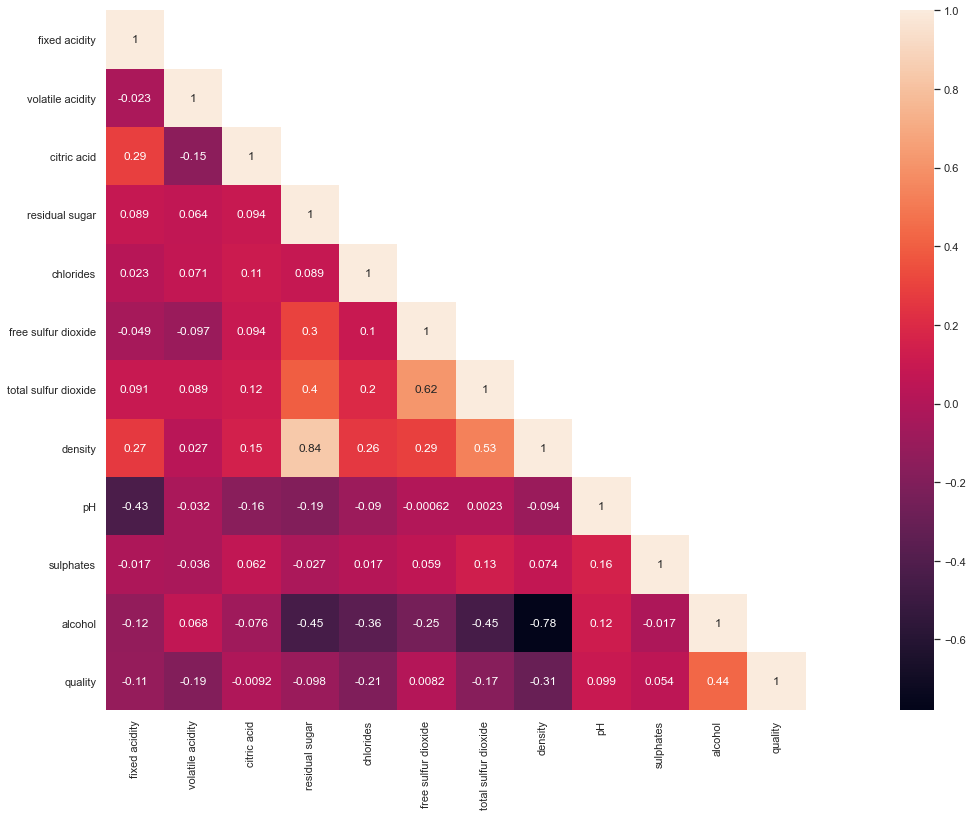

In [13]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

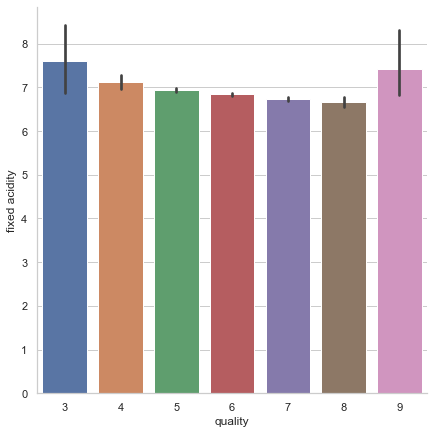

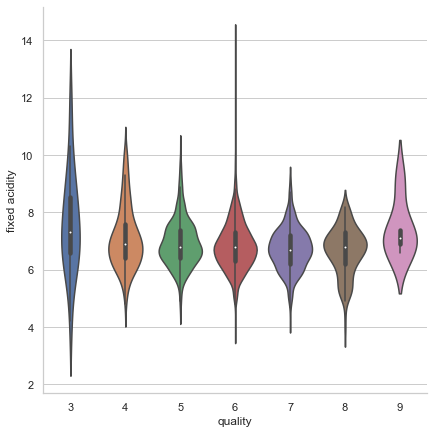

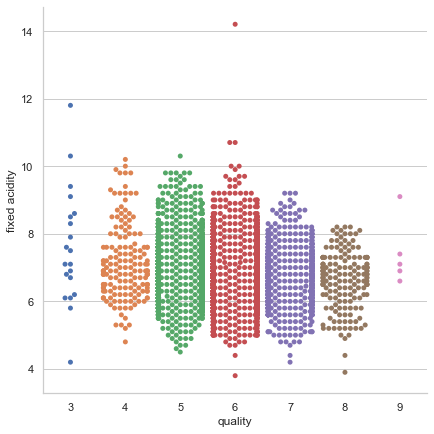

In [14]:
def plot(feature_x,target='quality'):
    sns.factorplot(x=target,y=feature_x,data=df,kind='bar',size=6,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='violin',size=6,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='swarm',size=6,aspect=1)
plot('fixed acidity','quality')    

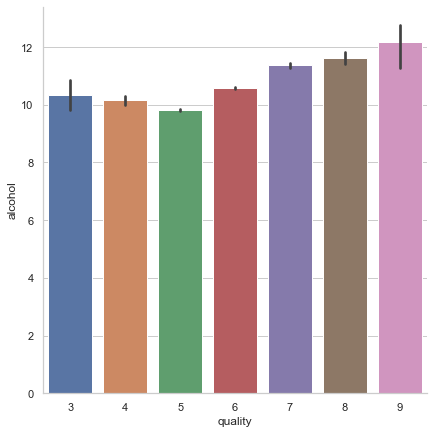

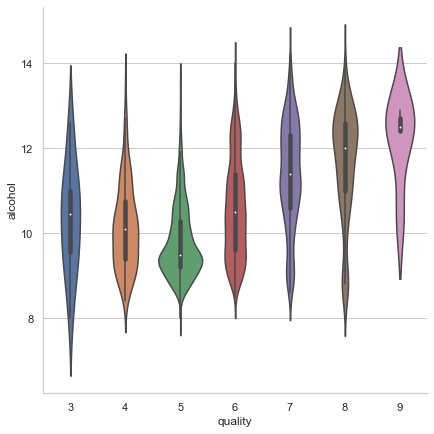

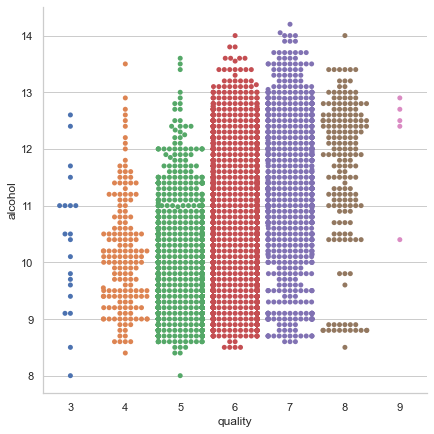

In [15]:
plot('alcohol','quality')

# data preparation

In [16]:
# use for regression
r_X = ori_df.drop('quality',axis=1)
r_Y = ori_df['quality']
r_x_train,r_x_test,r_y_train,r_y_test=train_test_split(r_X, r_Y, test_size=0.25,random_state=42)

In [17]:
# use for classification
bins = (2, 6.5, 10)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

X = df.drop('quality',axis=1)
Y = df['quality']
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.25,random_state=42)

# model selection

In [38]:
# linear regression
l_models = [
    LinearRegression(),
    RidgeCV(alphas=[0.1, 1.0, 10.0]) ,
    LassoCV(alphas=np.logspace(-3, 2, 10))]
model_names=['LinearRegression',
             'Ridge',
             'Lasso']
acc_0 = []
for model in range(len(l_models)):
    clf = l_models[model]
    clf.fit(r_x_train, r_y_train)
    
    pred_1 = pd.cut(clf.predict(r_x_test), bins = bins, labels = group_names)
    pred_2 = pd.cut(cross_val_predict(clf, r_X, r_Y, cv=10), bins = bins, labels = group_names) # cross valid
    true_1 = pd.cut(r_y_test, bins = bins, labels = group_names)
    true_2 = pd.cut(r_Y, bins = bins, labels = group_names)
    acc_0.append(accuracy_score(pred_1, true_1))
    
l_d={'Modelling Algo':model_names, 'Accuracy_test':acc_0,}

In [39]:
acc_linear_frame=pd.DataFrame(l_d)
acc_linear_frame

,Modelling Algo,Accuracy_test
0,LinearRegression,0.792653
1,Ridge,0.784490
2,Lasso,0.786122


In [26]:
models=[
        LogisticRegression(),
        GaussianNB(),
        
        KNeighborsClassifier(n_neighbors=3),
        KNeighborsClassifier(n_neighbors=10), 
        
        LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
        QuadraticDiscriminantAnalysis(store_covariance=True),

        DecisionTreeClassifier(),
        BaggingClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        
        LinearSVC(),
        SVC(kernel='rbf'),
       
        MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(5, 5), random_state=1),
        MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(10, 10), random_state=1)]
model_names=['LogisticRegression',
             'GaussianNB',
             
             'KNearestNeighbors_3',
             'KNearestNeighbors_10',
             
             'LDA',
             'QDA',

             'DecisionTree',
             'BaggingClassifier',
             'RandomForestClassifier',
             'GradientBoostingClassifier',
             'AdaBoostClassifier',
             
             'LinearSVM',
             'rbfSVM',
            
             'MLP_5',
             'MLP_10']

acc_0=[]
acc_1=[]
acc_2=[]
acc_3=[]
acc_4=[]
d={}

for model in range(len(models)):
    clf=models[model]
    
    clf.fit(x_train,y_train)
    pred_0=clf.predict(x_train) # train
    pred_1=clf.predict(x_test) # test
    pred_2=cross_val_predict(clf, X, Y, cv=10) # cross valid
    kf = KFold(n_splits=5)  # kfold
    test = []
    for train_index,test_index in kf.split(X, Y):
        train_x = np.array(X)[train_index]
        train_y = np.array(Y)[train_index]
        test_x = np.array(X)[test_index]
        test_y = np.array(Y)[test_index]
        clf.fit(train_x, train_y)
        test.append(accuracy_score(clf.predict(test_x),test_y))

    acc_0.append(accuracy_score(pred_0, y_train))
    acc_1.append(accuracy_score(pred_1, y_test))
    acc_2.append(accuracy_score(pred_2, Y))
    acc_4.append(f1_score(list(map(lambda x: 1 if x=='bad' else 0, pred_2)), list(map(lambda x: 1 if x=='bad' else 0, Y))))
    acc_3.append(sum(test)/5)
    
                    
d={'Modelling Algo':model_names,'Accuracy_train':acc_0,'Accuracy_test':acc_1, 'Accuracy_cross_val':acc_2,'F1_cross_val':acc_4, 'Accuracy_5_fold':acc_3}

In [27]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy_train,Accuracy_test,Accuracy_cross_val,F1_cross_val,Accuracy_5_fold
0,LogisticRegression,0.802886,0.786939,0.794814,0.878726,0.789908
1,GaussianNB,0.737544,0.715102,0.726215,0.807189,0.728227
2,KNearestNeighbors_3,0.885108,0.786939,0.735402,0.834989,0.726610
3,KNearestNeighbors_10,0.813232,0.766531,0.769294,0.864735,0.758871
4,LDA,0.809420,0.788571,0.796448,0.877383,0.791128
5,QDA,0.767765,0.728163,0.739486,0.819366,0.739666
6,DecisionTree,1.000000,0.827755,0.736423,0.830777,0.730077
7,BaggingClassifier,0.990743,0.870204,0.796039,0.876560,0.791532
8,RandomForestClassifier,1.000000,0.892245,0.812985,0.887937,0.805828
9,GradientBoostingClassifier,0.872039,0.827755,0.802164,0.880444,0.799704


# grid search

In [28]:
params_dict={'max_depth':[5, 10, 15, 20],
             'min_samples_leaf':[1, 5, 10, 15],
             'max_leaf_nodes':[10, 25, 50, 100, 150]}
clf_lr=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_leaf_nodes': [10, 25, 50, 100, 150],
                         'min_samples_leaf': [1, 5, 10, 15]},
             scoring='accuracy')

In [29]:
clf_lr.best_params_

{'max_depth': 20, 'max_leaf_nodes': 150, 'min_samples_leaf': 1}

In [30]:
clf_lr.best_score_ # the best accuracy obtained by Grid search on the train set.

0.8216724914109703

In [31]:
accuracy_score(cross_val_predict(clf, X, Y, cv=10), Y) # the best accuracy obtained by Grid search on the test set.

0.7856267864434463

## ROC

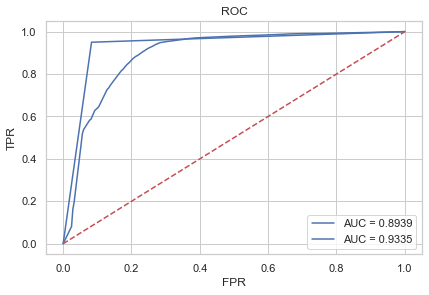

In [32]:
def plot_roc(labels_list, predict_prob_list):
    for labels,predict_prob in zip(labels_list, predict_prob_list):
        false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
        roc_auc=auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
        
    plt.title('ROC')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()

plot_roc([list(map(lambda x: 1 if x=='bad' else 0, Y)),
         list(map(lambda x: 1 if x=='bad' else 0, Y))], 
         [clf_lr.predict_proba(X)[:,0],
            models[6].predict_proba(X)[:,0]])

## confusion matrix

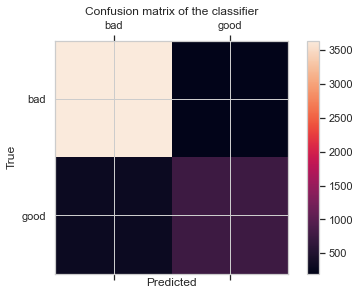

In [33]:
labels=["bad", "good"]
cm = confusion_matrix(Y, clf_lr.predict(X), labels)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 